<a href="https://colab.research.google.com/github/premkumarthimmagalla/AQI-App/blob/main/st20313528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from datetime import datetime

import calendar

In [3]:
import time
start_time = time.time()


In [16]:

data = "/content/drive/MyDrive/PRSA_Data"



In [17]:
# Read and concatenate all CSV files in the directory into a single DataFrame
all_files = glob(os.path.join(data, '*.csv'))
df_list = [pd.read_csv(file) for file in all_files]


In [18]:
df = pd.concat(df_list, ignore_index=True)

In [19]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd,WSPM,station,Date,Open,High,Low,Close,Adj Close,Volume
0,1.0,2013.0,3.0,1.0,0.0,4.0,4.0,4.0,7.0,300.0,...,NNW,4.4,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2013.0,3.0,1.0,1.0,8.0,8.0,4.0,7.0,300.0,...,N,4.7,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2013.0,3.0,1.0,2.0,7.0,7.0,5.0,10.0,300.0,...,NNW,5.6,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2013.0,3.0,1.0,3.0,6.0,6.0,11.0,11.0,300.0,...,NW,3.1,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2013.0,3.0,1.0,4.0,3.0,3.0,12.0,12.0,300.0,...,N,2.0,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421774 entries, 0 to 421773
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   No         420768 non-null  float64
 1   year       420768 non-null  float64
 2   month      420768 non-null  float64
 3   day        420768 non-null  float64
 4   hour       420768 non-null  float64
 5   PM2.5      412029 non-null  float64
 6   PM10       414319 non-null  float64
 7   SO2        411747 non-null  float64
 8   NO2        408652 non-null  float64
 9   CO         400067 non-null  float64
 10  O3         407491 non-null  float64
 11  TEMP       420370 non-null  float64
 12  PRES       420375 non-null  float64
 13  DEWP       420365 non-null  float64
 14  RAIN       420378 non-null  float64
 15  wd         418946 non-null  object 
 16  WSPM       420450 non-null  float64
 17  station    420768 non-null  object 
 18  Date       1006 non-null    object 
 19  Open       1006 non-nul

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print('\nMissing Values in Each Column:')
print(missing_values)
df.drop('No', axis = 1, inplace = True)


Missing Values in Each Column:
No             1006
year           1006
month          1006
day            1006
hour           1006
PM2.5          9745
PM10           7455
SO2           10027
NO2           13122
CO            21707
O3            14283
TEMP           1404
PRES           1399
DEWP           1409
RAIN           1396
wd             2828
WSPM           1324
station        1006
Date         420768
Open         420768
High         420768
Low          420768
Close        420768
Adj Close    420768
Volume       420768
dtype: int64


In [22]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,PRES,DEWP,RAIN,WSPM,Open,High,Low,Close,Adj Close,Volume
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,...,420375.000000,420365.000000,420378.000000,420450.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,...,1010.746982,2.490822,0.064476,1.729711,131.680586,133.353111,130.204304,131.870169,130.628480,2.657776e+07
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,...,10.474055,13.793847,0.821004,1.246386,104.420170,105.659186,103.491795,104.711618,103.802969,1.609903e+07
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,...,982.400000,-43.400000,0.000000,0.000000,22.110001,23.490000,20.000000,22.000000,22.000000,4.290500e+06
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,...,1002.300000,-8.900000,0.000000,0.900000,33.062501,33.704999,32.475001,33.062501,33.062501,1.600338e+07
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,...,1010.400000,3.100000,0.000000,1.400000,95.359999,96.310001,93.305001,94.420002,93.013126,2.271815e+07
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,...,1019.000000,15.100000,0.000000,2.200000,215.882496,218.562503,212.917499,215.367504,211.111572,3.244212e+07
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,...,1042.800000,29.100000,72.500000,13.200000,365.000000,372.380005,362.269989,366.529999,366.529999,1.227528e+08


In [25]:
# Function to assign AQI category based on pollutant levels
def assign_aqi_category(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    max_value = row[pollutants].max()

    if max_value <= 50:
        return 'Excellent'
    elif max_value <= 100:
        return 'Good'
    elif max_value <= 150:
        return 'Slightly Polluted'
    elif max_value <= 200:
        return 'Lightly Polluted'
    elif max_value <= 250:
        return 'Moderately Polluted'
    elif max_value <= 300:
        return 'Heavily Polluted'
    else:
        return 'Severely Polluted'

In [26]:
# prompt: min amd max value of each variable.

# Calculate min and max values for each variable
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
    min_val = df[column].min()
    max_val = df[column].max()
    print(f"Variable: {column}")
    print(f"Min Value: {min_val}")
    print(f"Max Value: {max_val}")
    print("-" * 20)

Variable: year
Min Value: 2013.0
Max Value: 2017.0
--------------------
Variable: month
Min Value: 1.0
Max Value: 12.0
--------------------
Variable: day
Min Value: 1.0
Max Value: 31.0
--------------------
Variable: hour
Min Value: 0.0
Max Value: 23.0
--------------------
Variable: PM2.5
Min Value: 2.0
Max Value: 999.0
--------------------
Variable: PM10
Min Value: 2.0
Max Value: 999.0
--------------------
Variable: SO2
Min Value: 0.2856
Max Value: 500.0
--------------------
Variable: NO2
Min Value: 1.0265
Max Value: 290.0
--------------------
Variable: CO
Min Value: 100.0
Max Value: 10000.0
--------------------
Variable: O3
Min Value: 0.2142
Max Value: 1071.0
--------------------
Variable: TEMP
Min Value: -19.9
Max Value: 41.6
--------------------
Variable: PRES
Min Value: 982.4
Max Value: 1042.8
--------------------
Variable: DEWP
Min Value: -43.4
Max Value: 29.1
--------------------
Variable: RAIN
Min Value: 0.0
Max Value: 72.5
--------------------
Variable: WSPM
Min Value: 0.0
Max 

In [27]:
# Apply the AQI category function to the DataFrame
df['AQI'] = df.apply(assign_aqi_category, axis=1)

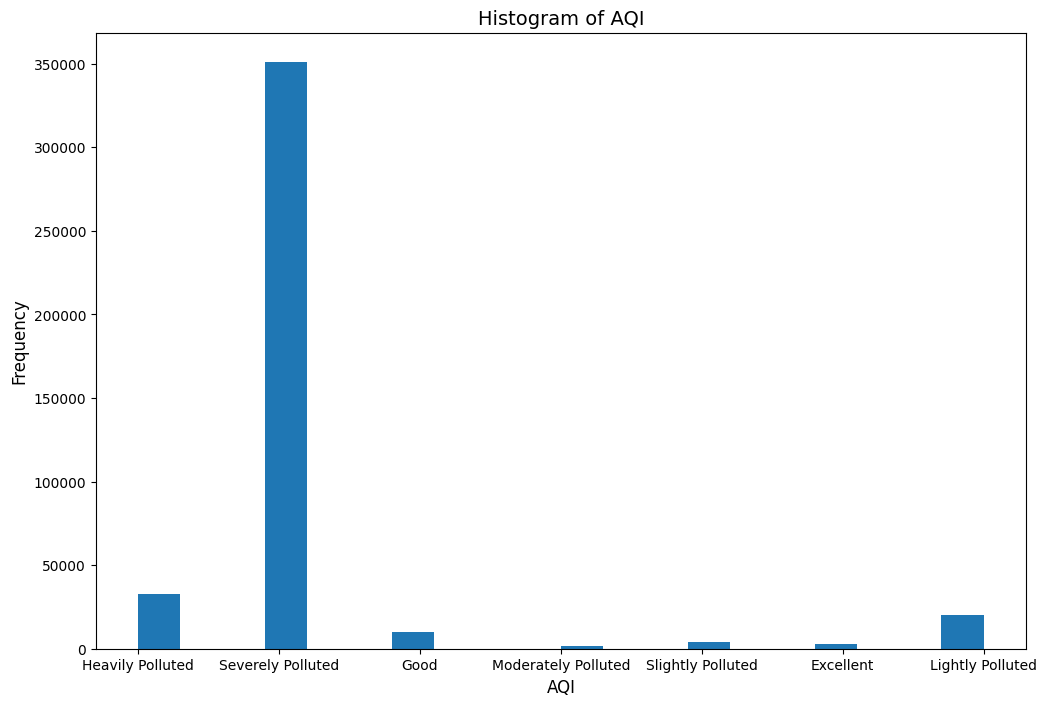

In [28]:
# Histogram
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
plt.hist(df['AQI'], bins=20)
plt.xlabel('AQI', fontsize=12)  # Increase font size of labels
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of AQI', fontsize=14)  # Increase font size of title
plt.xticks(fontsize=10)  # Increase font size of x-axis ticks
plt.yticks(fontsize=10)  # Increase font size of y-axis ticks
plt.show()

In [29]:
# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print('\nPercentage of Missing Values:')
print(missing_percentage.round(2))


Percentage of Missing Values:
No            0.24
year          0.24
month         0.24
day           0.24
hour          0.24
PM2.5         2.31
PM10          1.77
SO2           2.38
NO2           3.11
CO            5.15
O3            3.39
TEMP          0.33
PRES          0.33
DEWP          0.33
RAIN          0.33
wd            0.67
WSPM          0.31
station       0.24
Date         99.76
Open         99.76
High         99.76
Low          99.76
Close        99.76
Adj Close    99.76
Volume       99.76
dtype: float64


In [30]:
# Unique values in categorical columns
print('\nUnique Wind Directions:', df['wd'].unique())
print('Unique Stations:', df['station'].unique())
print('Unique AQI Categories:', df['AQI'].unique())



Unique Wind Directions: ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]
Unique Stations: ['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong' nan]
Unique AQI Categories: ['Heavily Polluted' 'Severely Polluted' 'Good' 'Moderately Polluted'
 'Slightly Polluted' 'Excellent' 'Lightly Polluted']


In [39]:
# Exclude non-numeric columns for analysis
columns_to_exclude = ['wd', 'station', 'AQI', 'Date']
df_numeric = df.drop(columns=columns_to_exclude)

In [40]:
# Calculate skewness
skewness = df_numeric.skew()
print('\nSkewness of Numeric Columns:')
print(skewness)



Skewness of Numeric Columns:
year          0.054847
month        -0.009294
day           0.006760
hour          0.000000
PM2.5         2.013975
PM10          1.885835
SO2           3.009503
NO2           1.050055
CO            2.570129
O3            1.660095
TEMP         -0.104267
PRES          0.106314
DEWP         -0.187736
RAIN         30.043633
WSPM          1.625590
Open          0.383813
High          0.387932
Low           0.382476
Close         0.387075
Adj Close     0.409919
Volume        2.041756
dtype: float64


<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


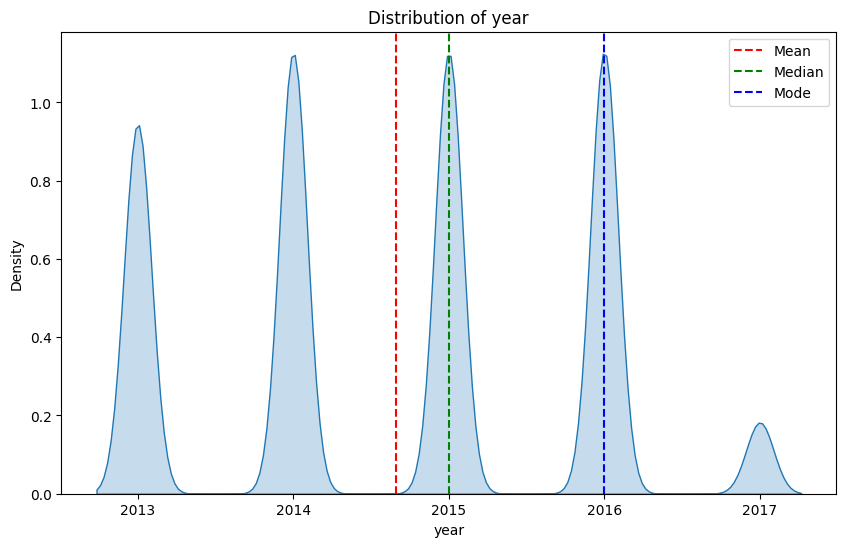

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


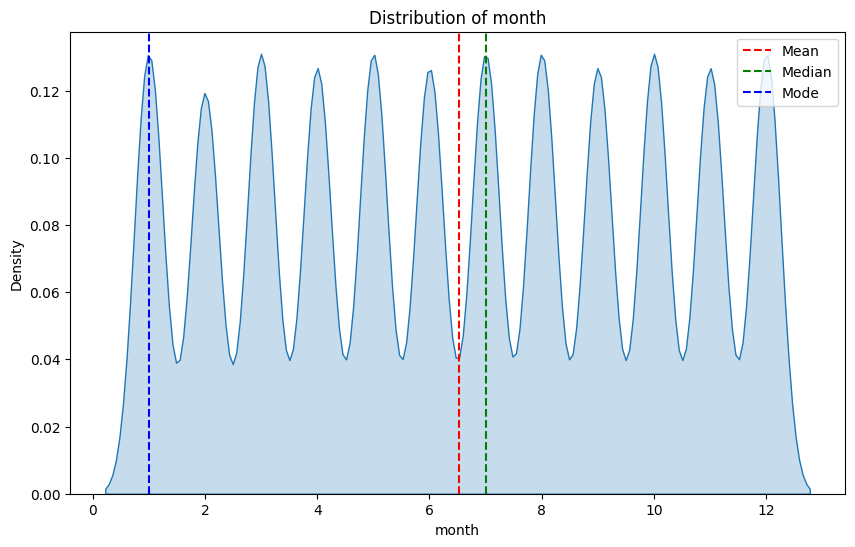

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


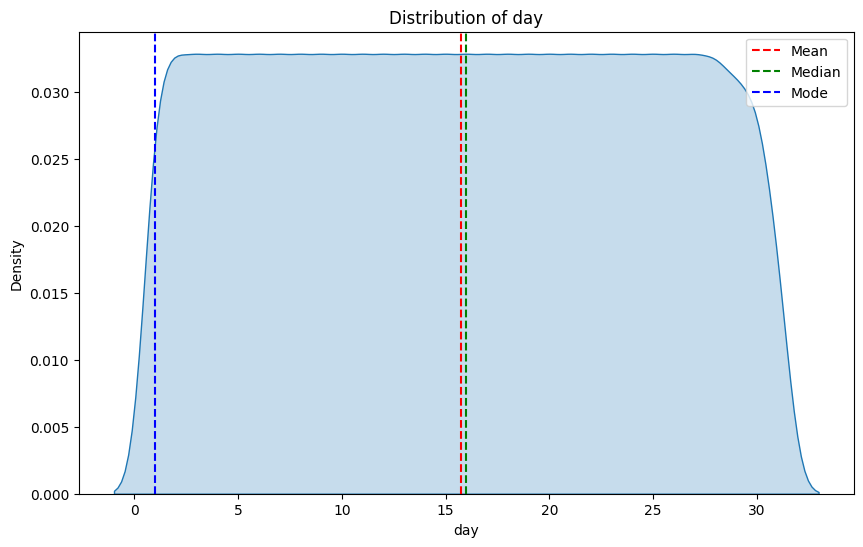

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


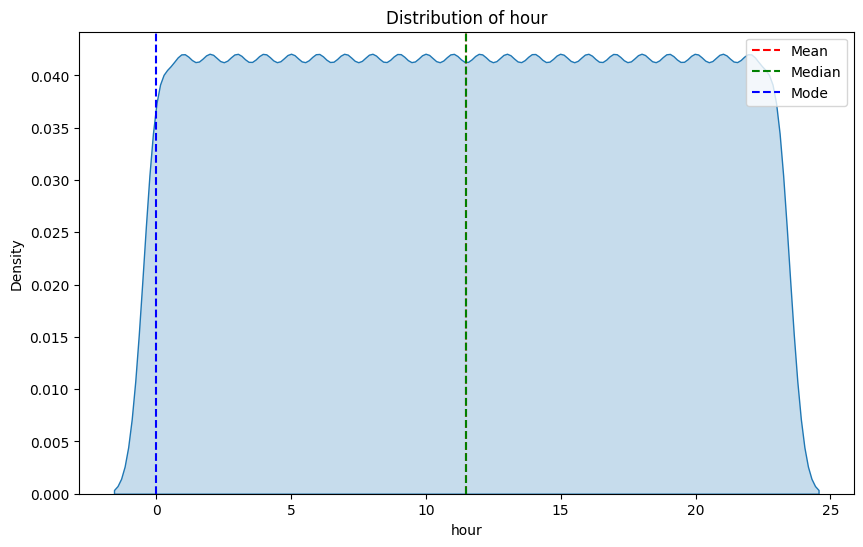

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


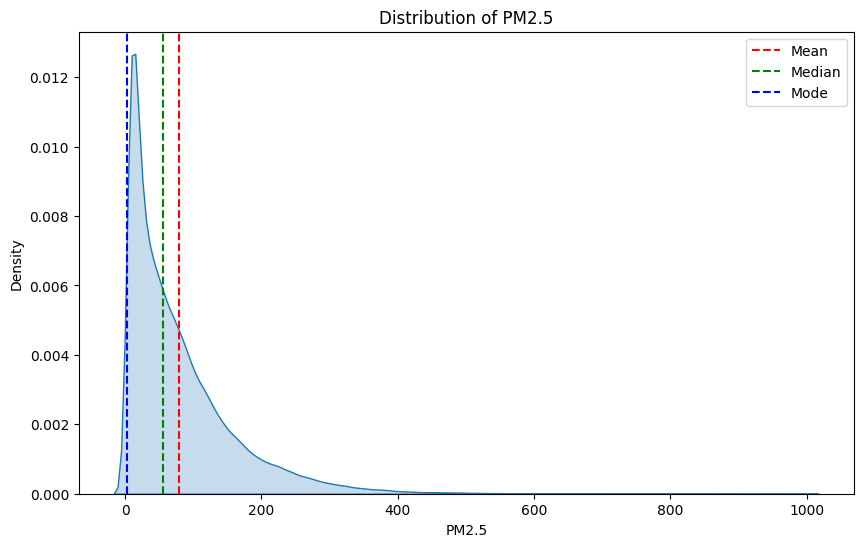

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


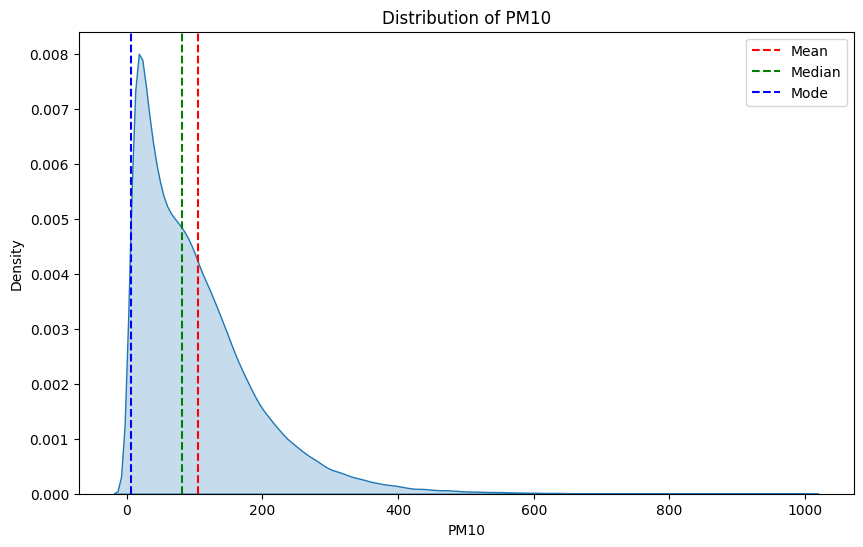

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


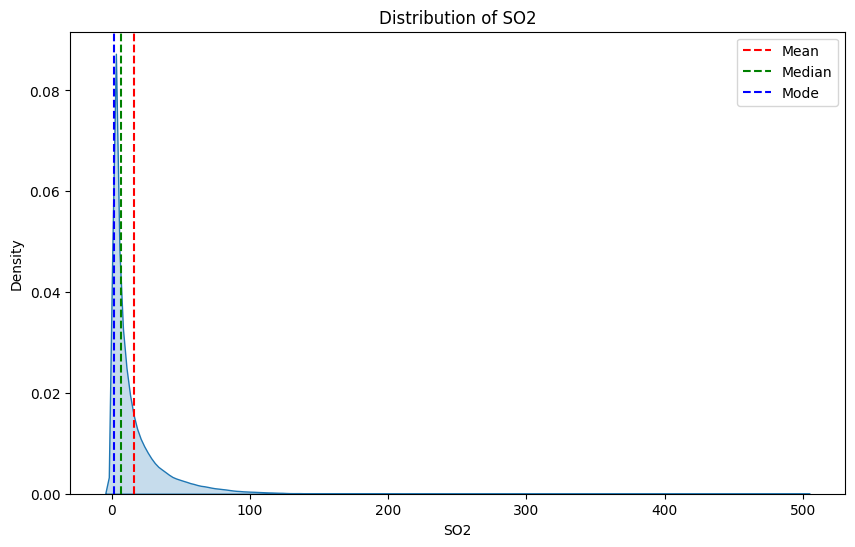

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


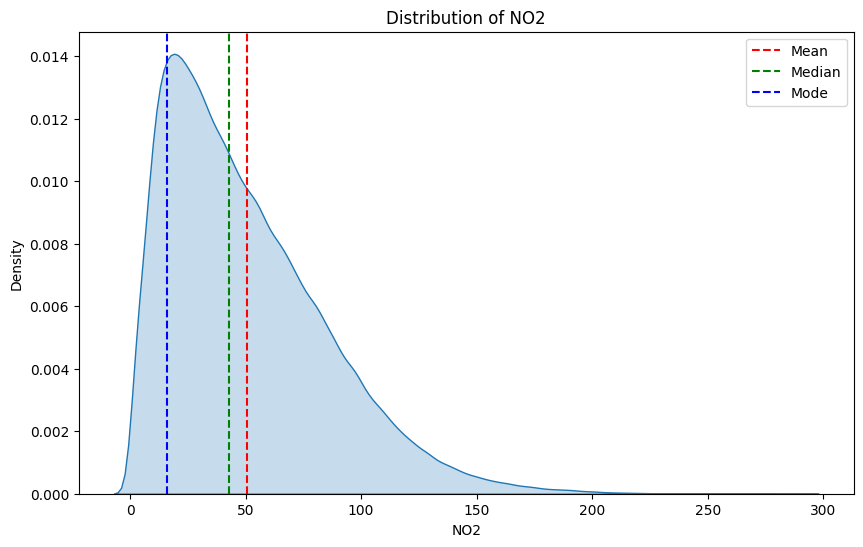

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


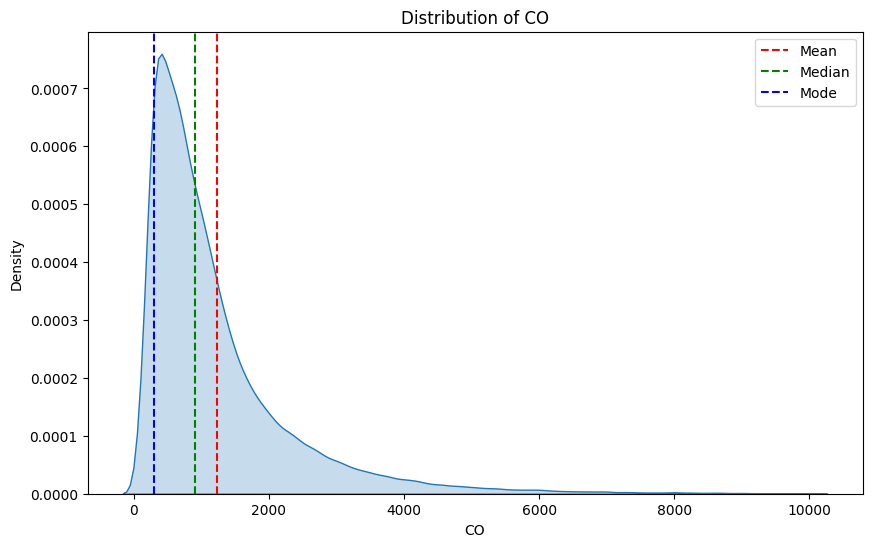

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


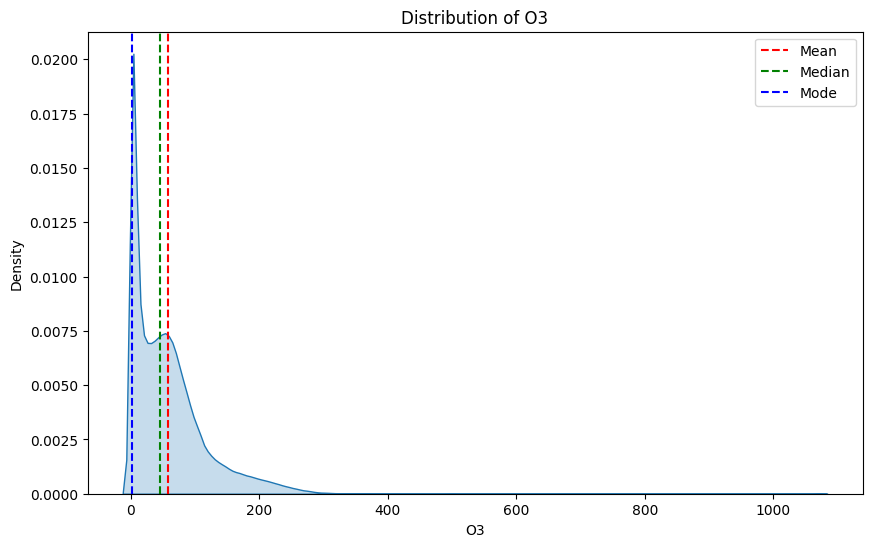

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


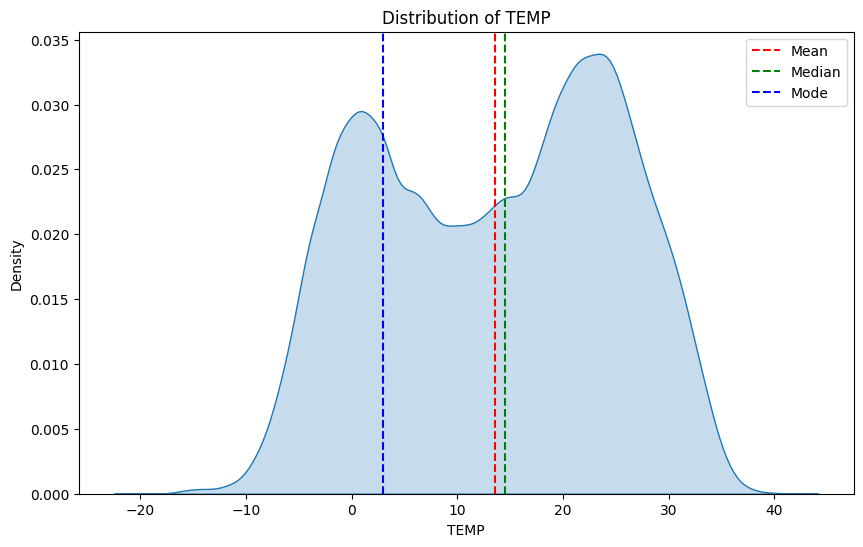

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


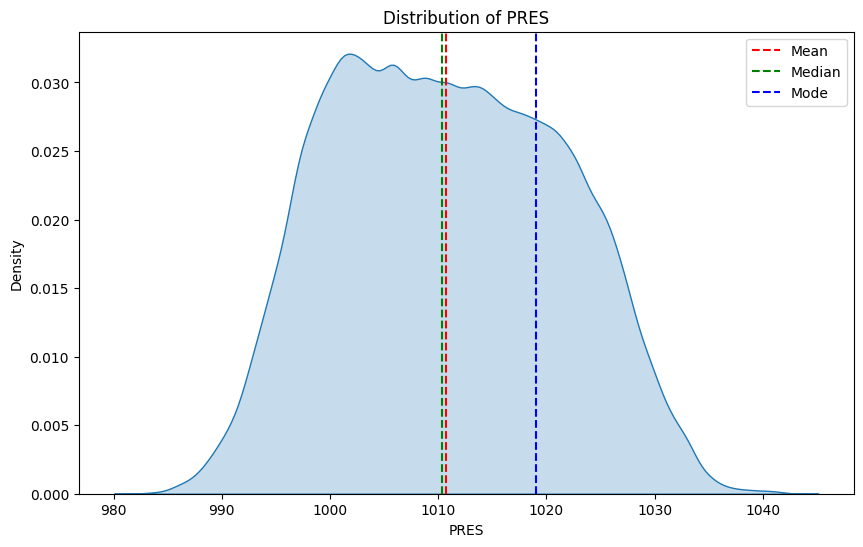

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


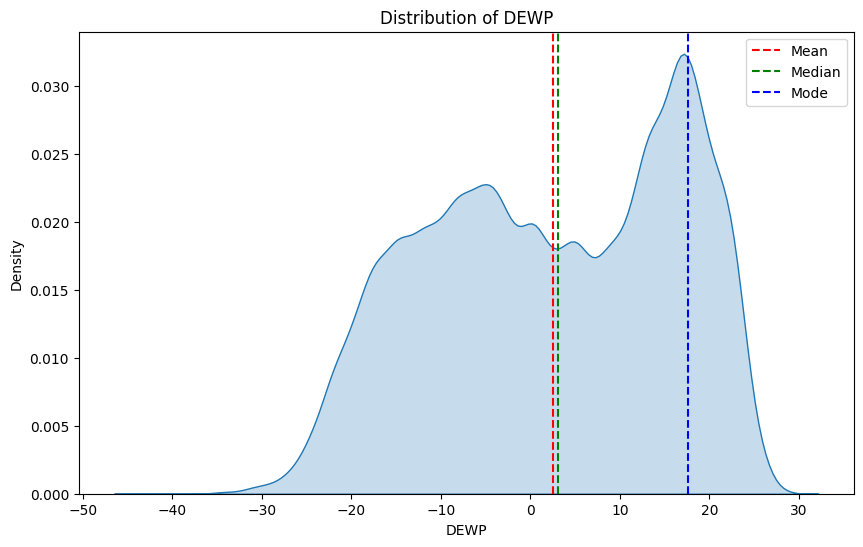

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


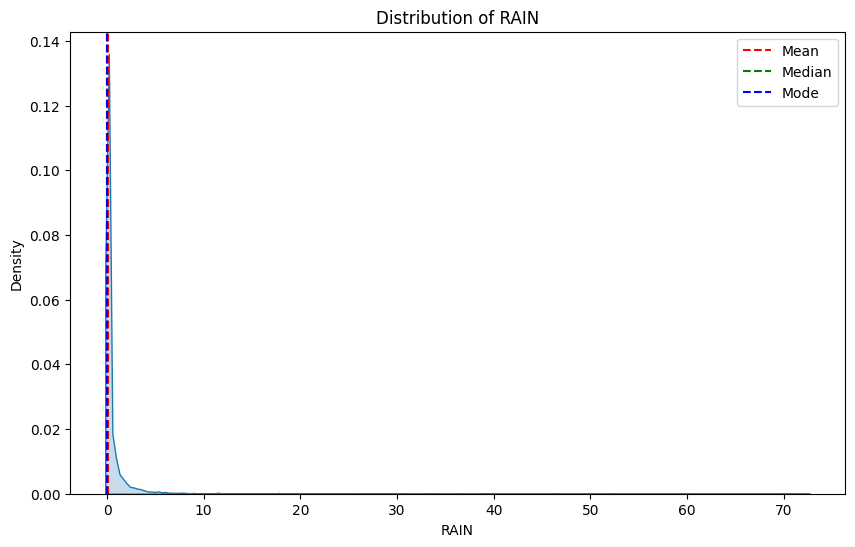

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


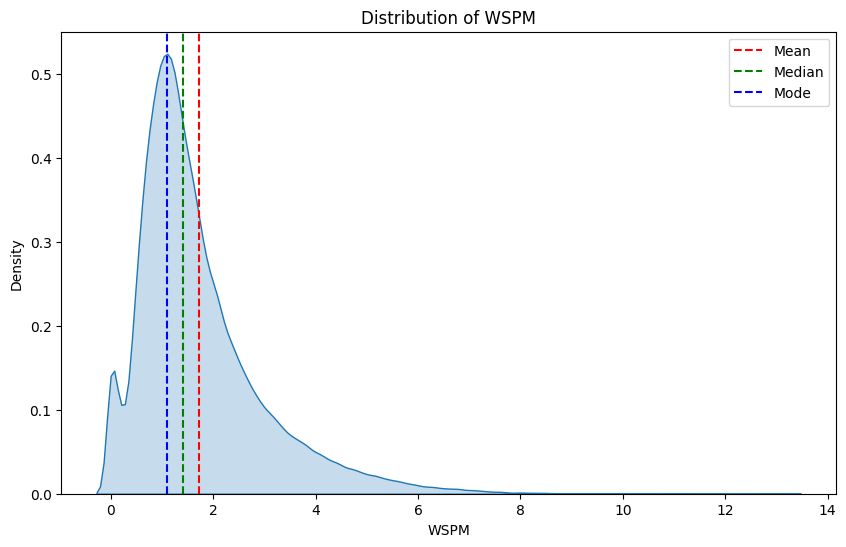

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


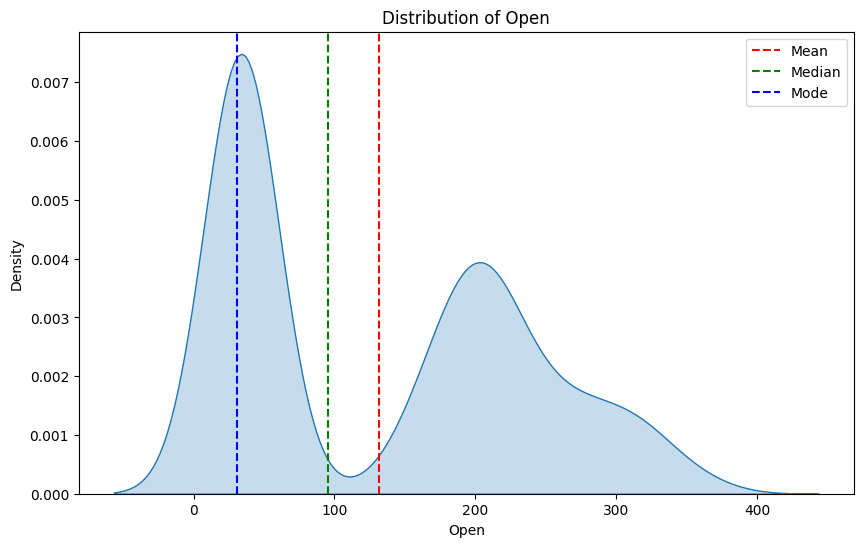

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


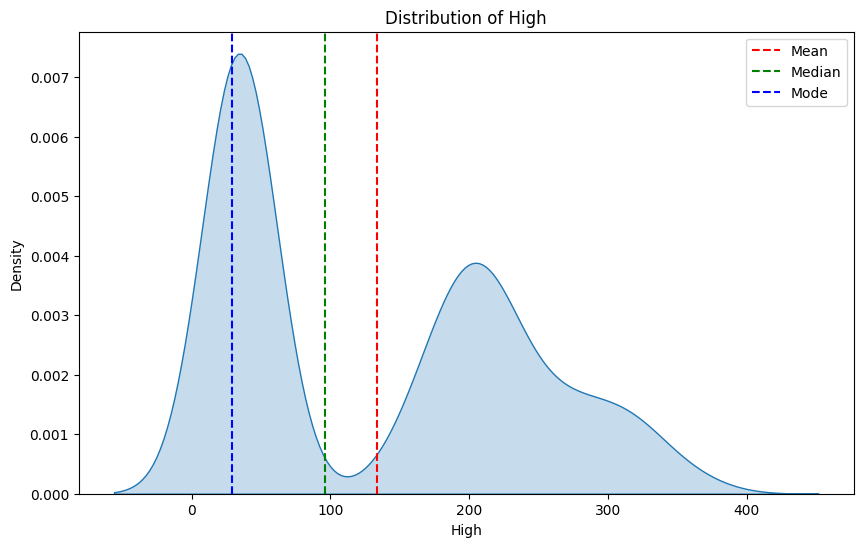

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


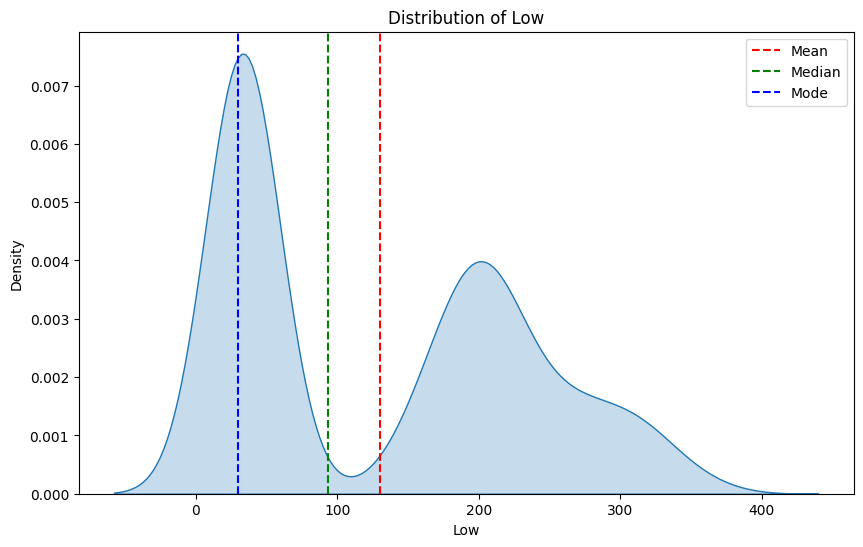

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


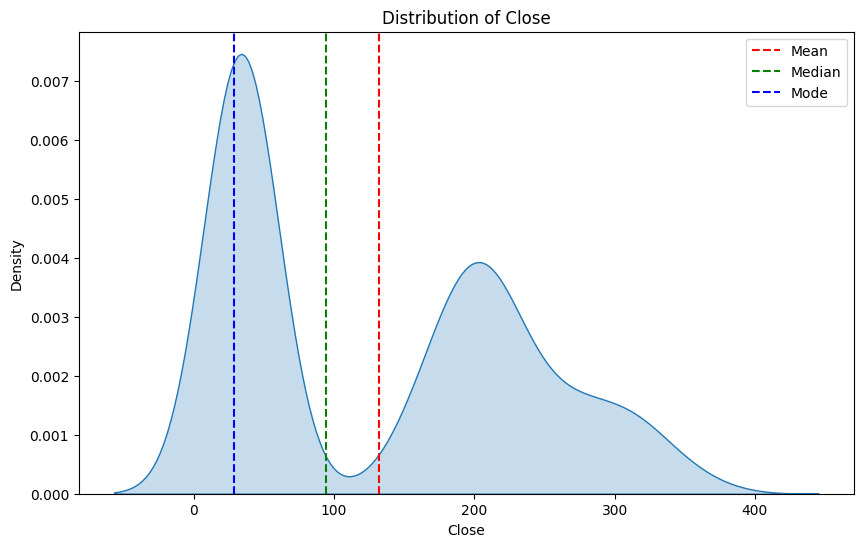

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


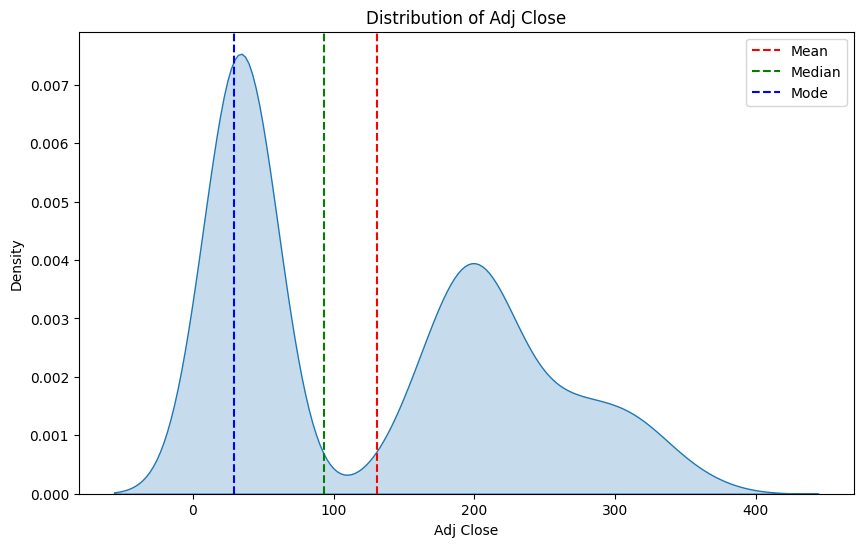

<ipython-input-41-619dcdd2867e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col].dropna(), shade=True)


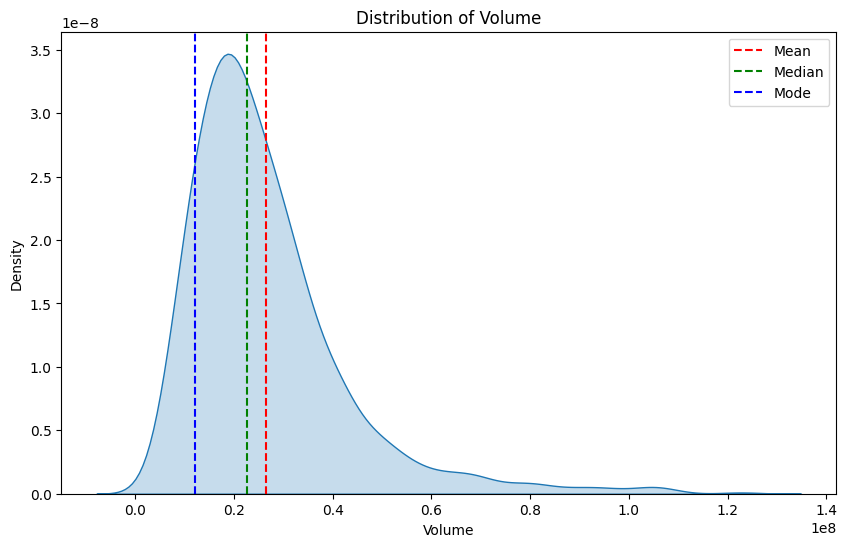

In [41]:
# Plot distributions with mean, median, and mode
numeric_cols = df_numeric.columns
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_numeric[col].dropna(), shade=True)
    plt.axvline(df_numeric[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df_numeric[col].median(), color='green', linestyle='--', label='Median')
    plt.axvline(df_numeric[col].mode()[0], color='blue', linestyle='--', label='Mode')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

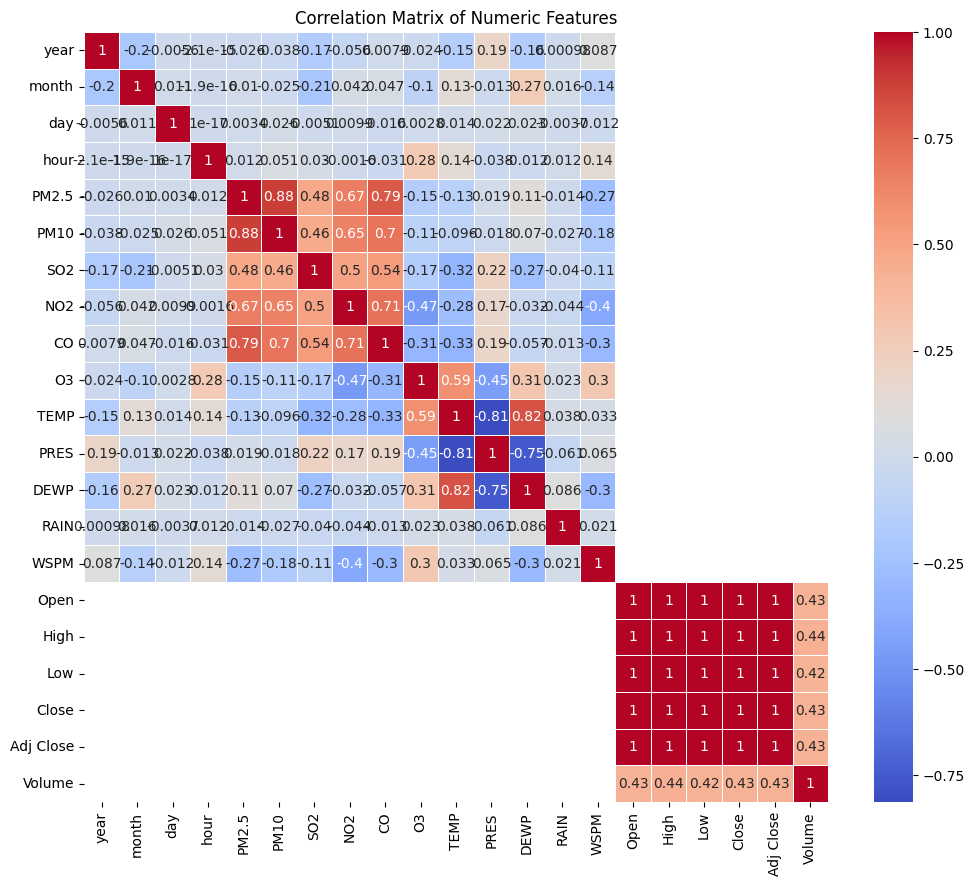

In [42]:
# Pearson correlation matrix
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [43]:
# Handle missing values by imputing median
for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Verify that missing values have been imputed
missing_values_after = df.isnull().sum()
print('\nMissing Values After Imputation:')
print(missing_values_after)


Missing Values After Imputation:
year              0
month             0
day               0
hour              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
TEMP              0
PRES              0
DEWP              0
RAIN              0
wd             2828
WSPM              0
station        1006
Date         420768
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
AQI               0
dtype: int64


<ipython-input-43-1bb46e84f66b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [44]:
# Convert date components to datetime object
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Add day of week
df['day_of_week'] = df['date'].dt.day_name()

EDA

In [45]:
# Define the list of pollutants
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']


In [47]:
# Plotting median pollutant levels per year
yearly_median = df.groupby('year')[pollutants].median().reset_index()


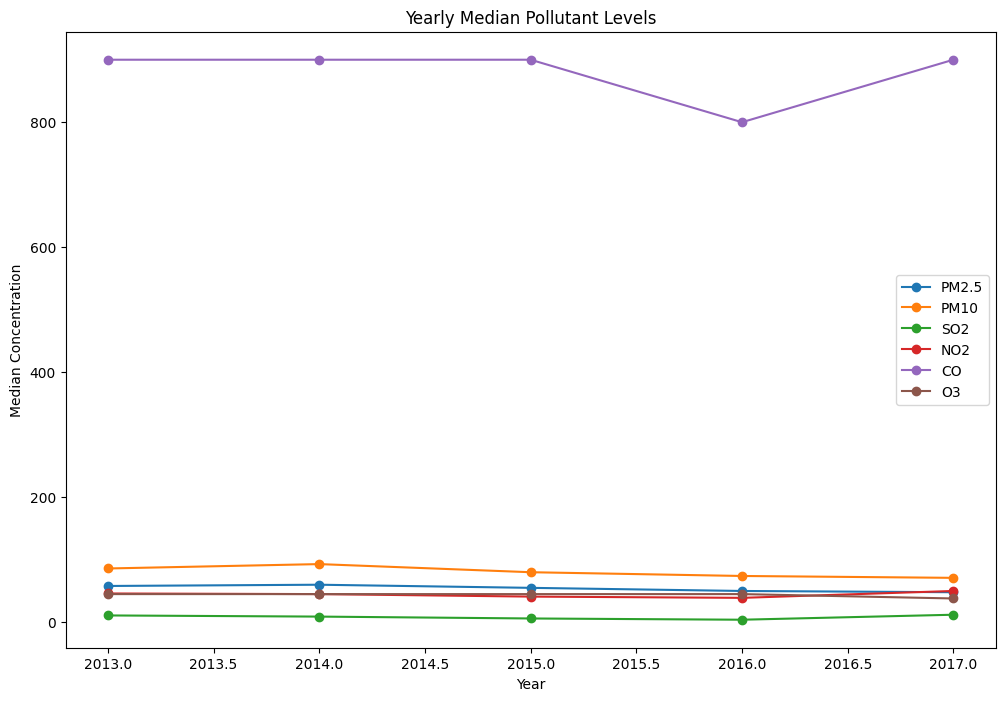

In [48]:
plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    plt.plot(yearly_median['year'], yearly_median[pollutant], marker='o', label=pollutant)
plt.xlabel('Year')
plt.ylabel('Median Concentration')
plt.title('Yearly Median Pollutant Levels')
plt.legend()
plt.show()

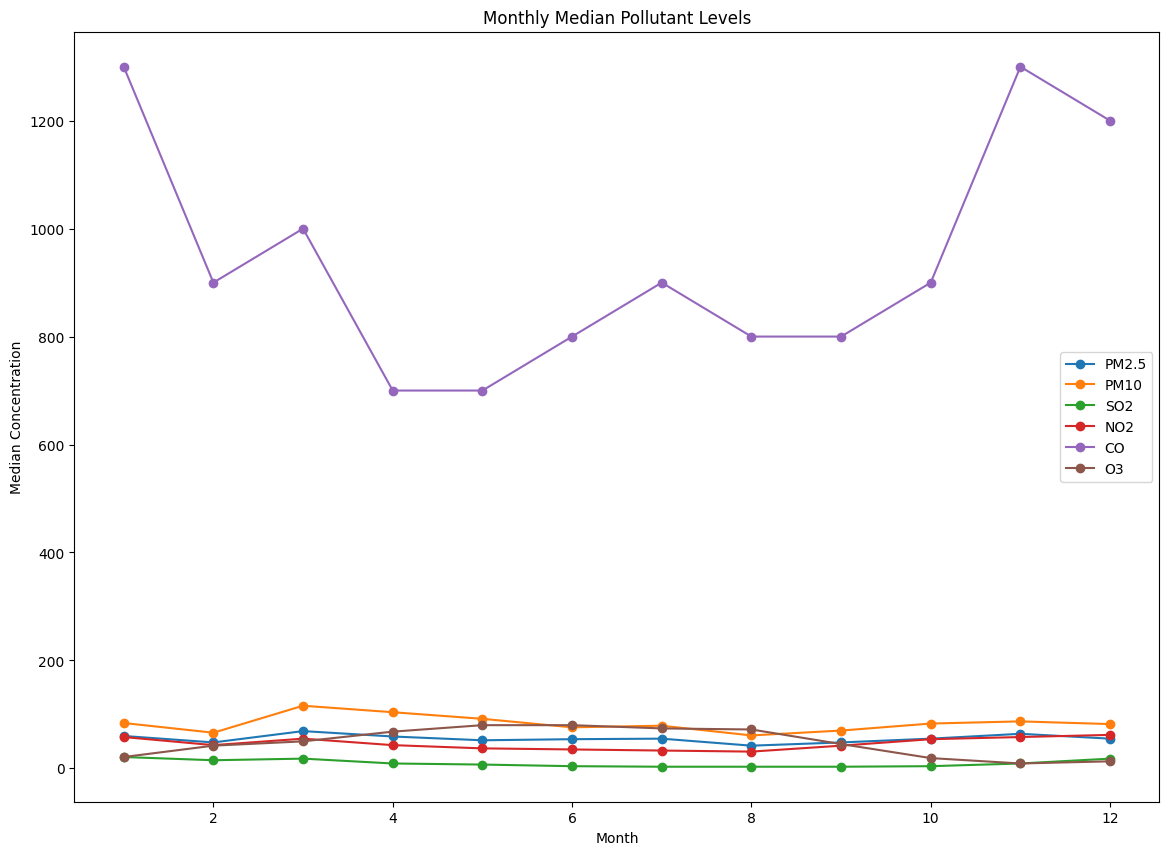

In [49]:

# Plotting median pollutant levels per month for each year in a single plot
months = range(1, 13)
plt.figure(figsize=(14, 10))
for pollutant in pollutants:
    monthly_median = df.groupby('month')[pollutant].median()
    plt.plot(months, monthly_median, marker='o', label=pollutant)
plt.xlabel('Month')
plt.ylabel('Median Concentration')
plt.title('Monthly Median Pollutant Levels')
plt.legend()
plt.show()

In [54]:
print("Unique hours in dataset:", sorted(df['hour'].unique()))

Unique hours in dataset: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 11.5, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]


In [55]:
df['hour'] = df['hour'].round()

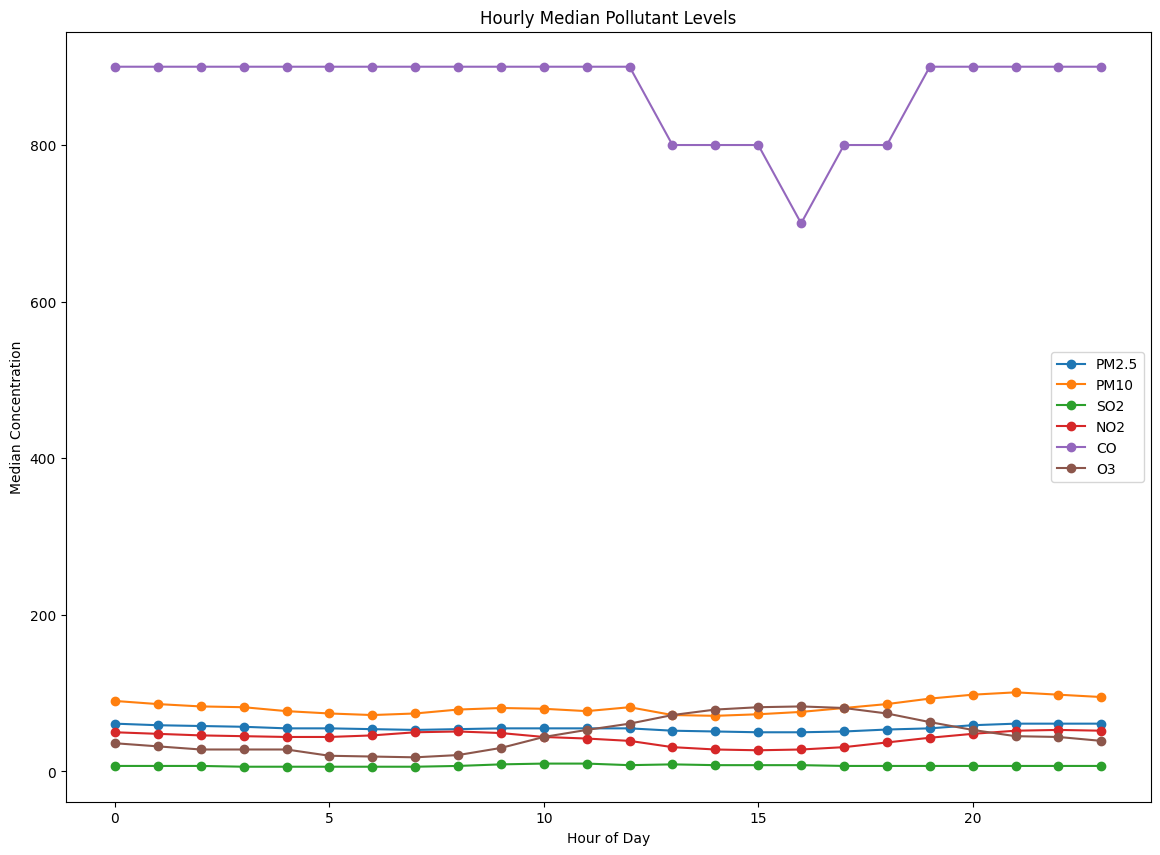

In [57]:
# Plotting median pollutant levels by hour of day
hours = range(0, 24)
plt.figure(figsize=(14, 10))
for pollutant in pollutants:
    hourly_median = df.groupby('hour')[pollutant].median()
    plt.plot(hours, hourly_median, marker='o', label=pollutant)
plt.xlabel('Hour of Day')
plt.ylabel('Median Concentration')
plt.title('Hourly Median Pollutant Levels')
plt.legend()
plt.show()

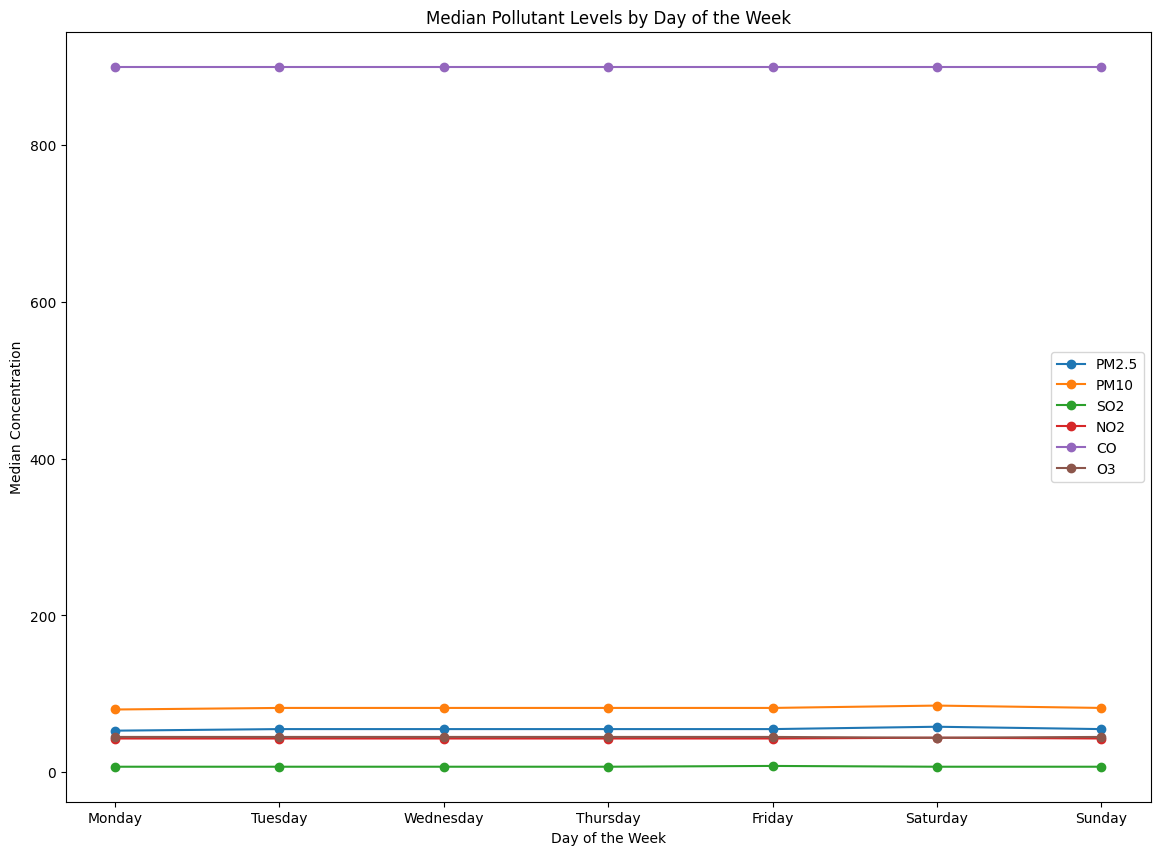

In [58]:
# Analyzing pollutants by day of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(14, 10))
for pollutant in pollutants:
    day_median = df.groupby('day_of_week')[pollutant].median().reindex(days_order)
    plt.plot(days_order, day_median, marker='o', label=pollutant)
plt.xlabel('Day of the Week')
plt.ylabel('Median Concentration')
plt.title('Median Pollutant Levels by Day of the Week')
plt.legend()
plt.show()

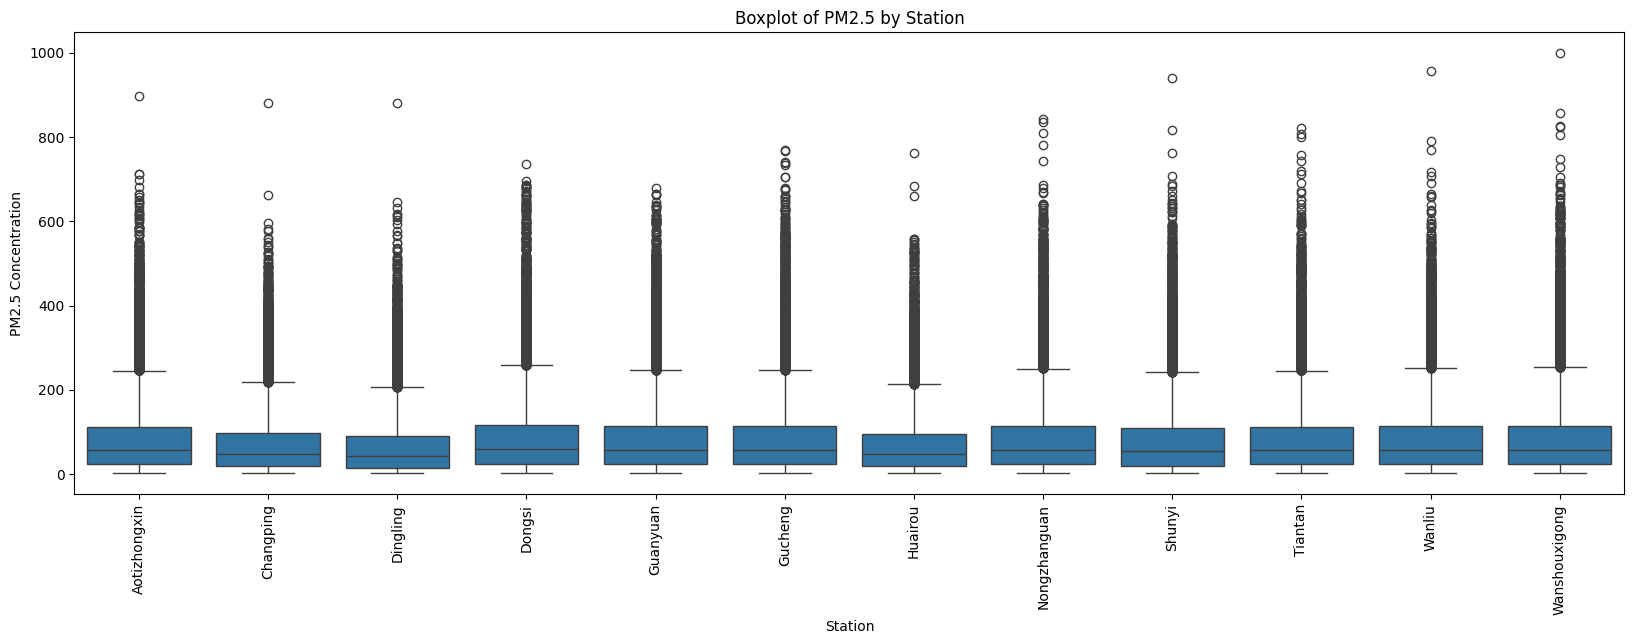

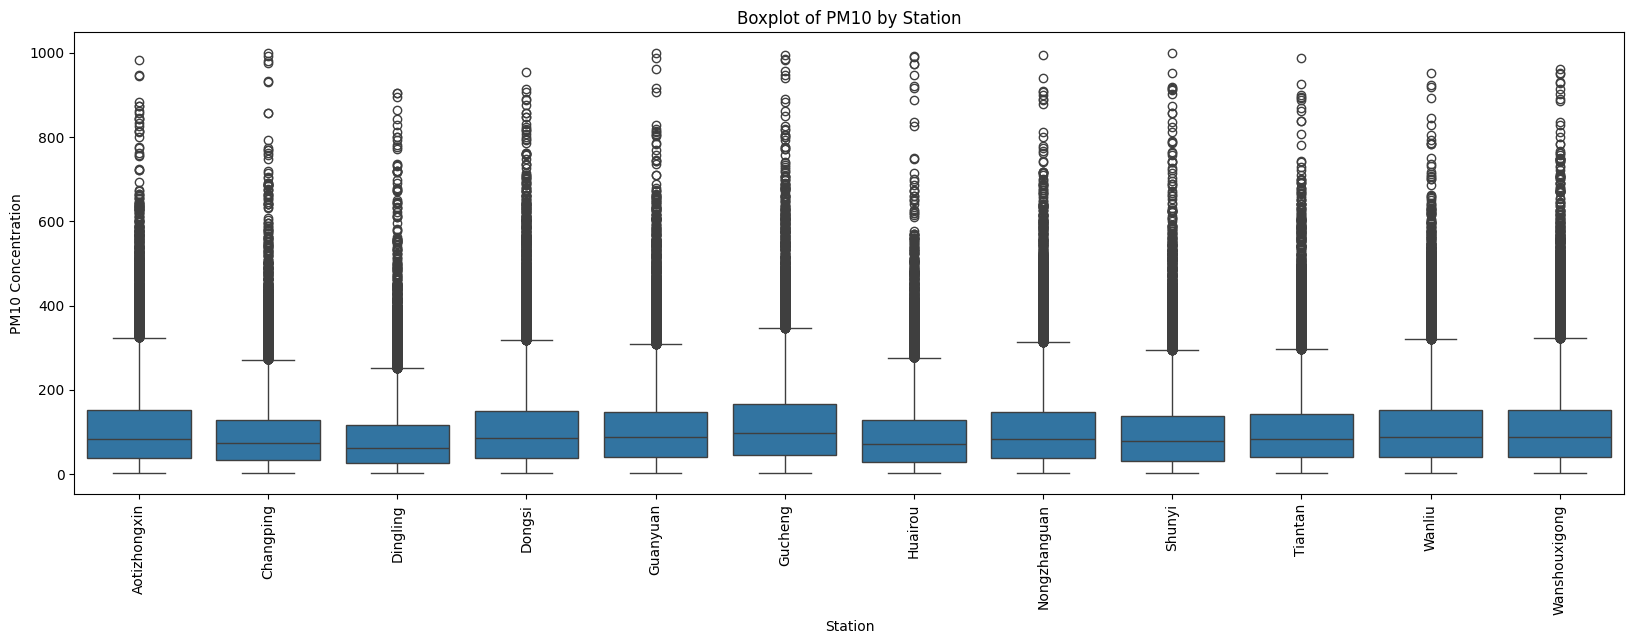

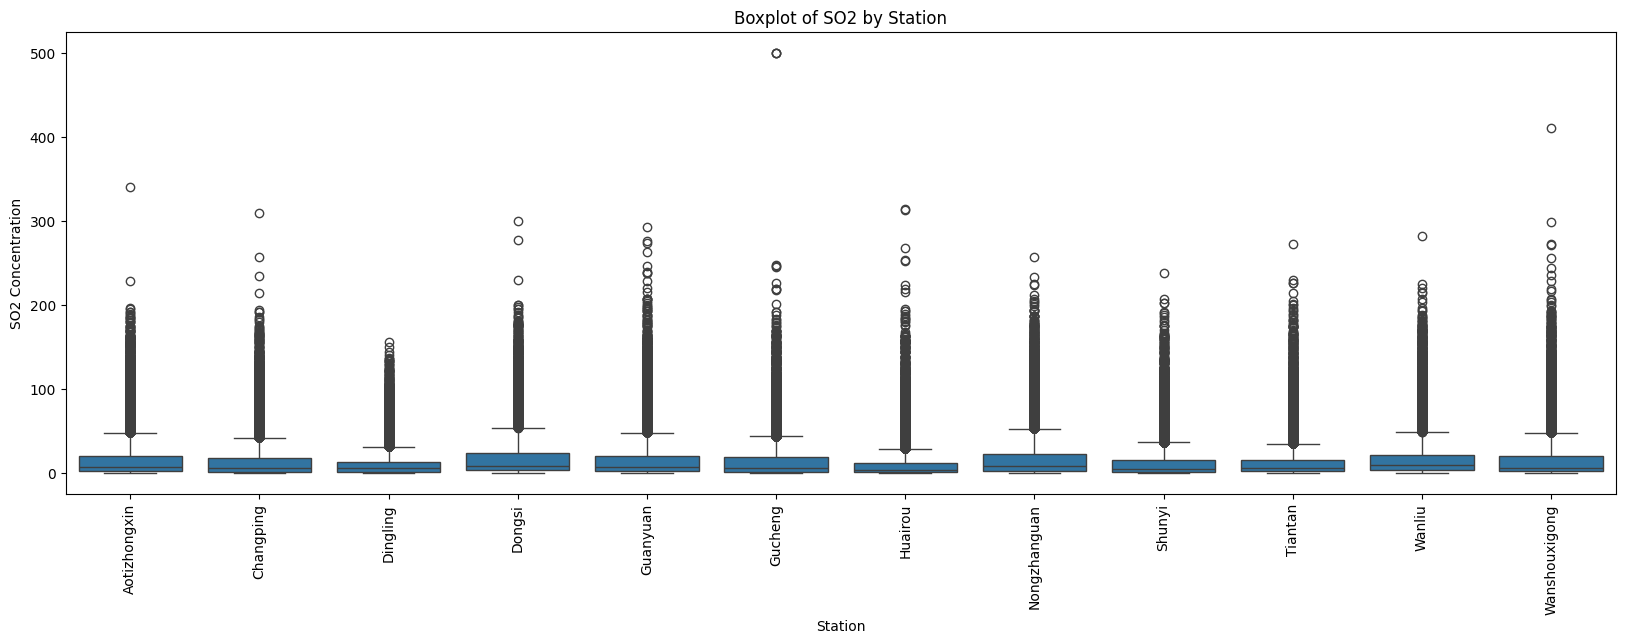

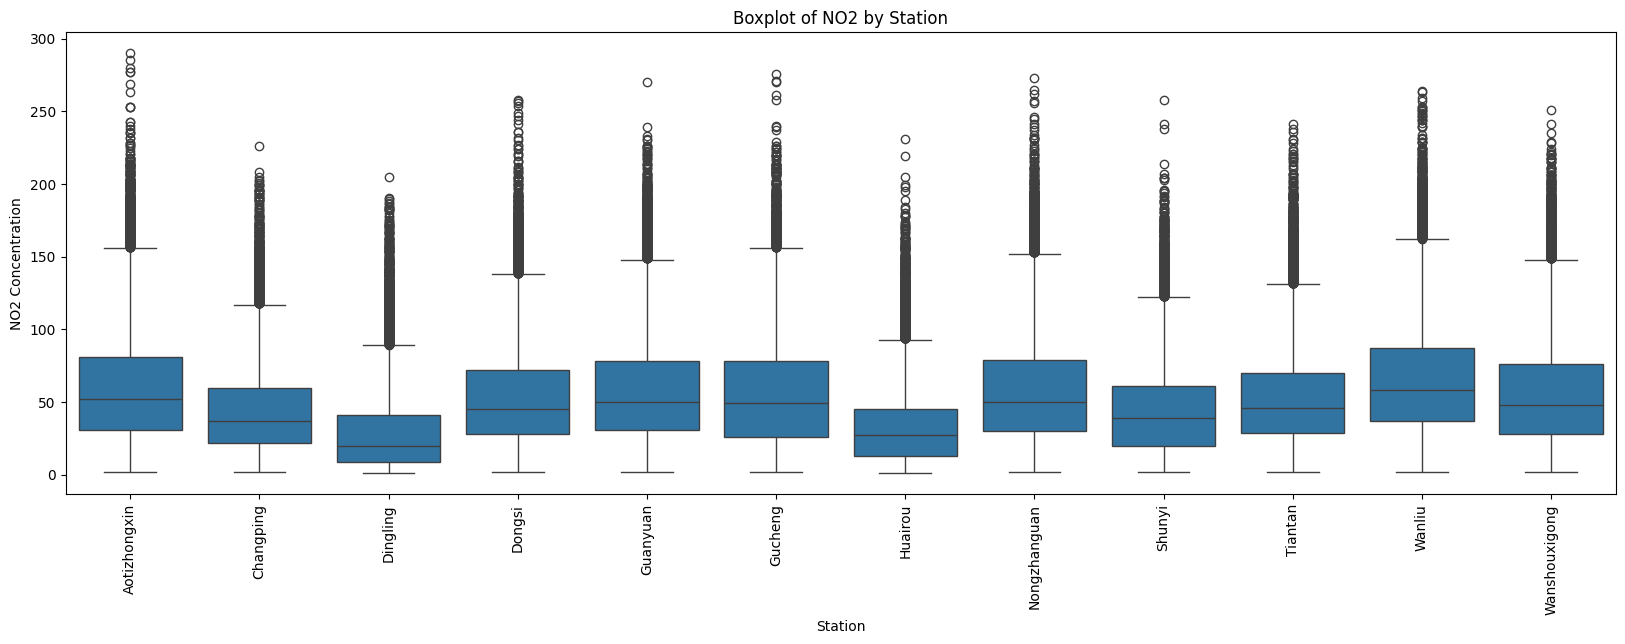

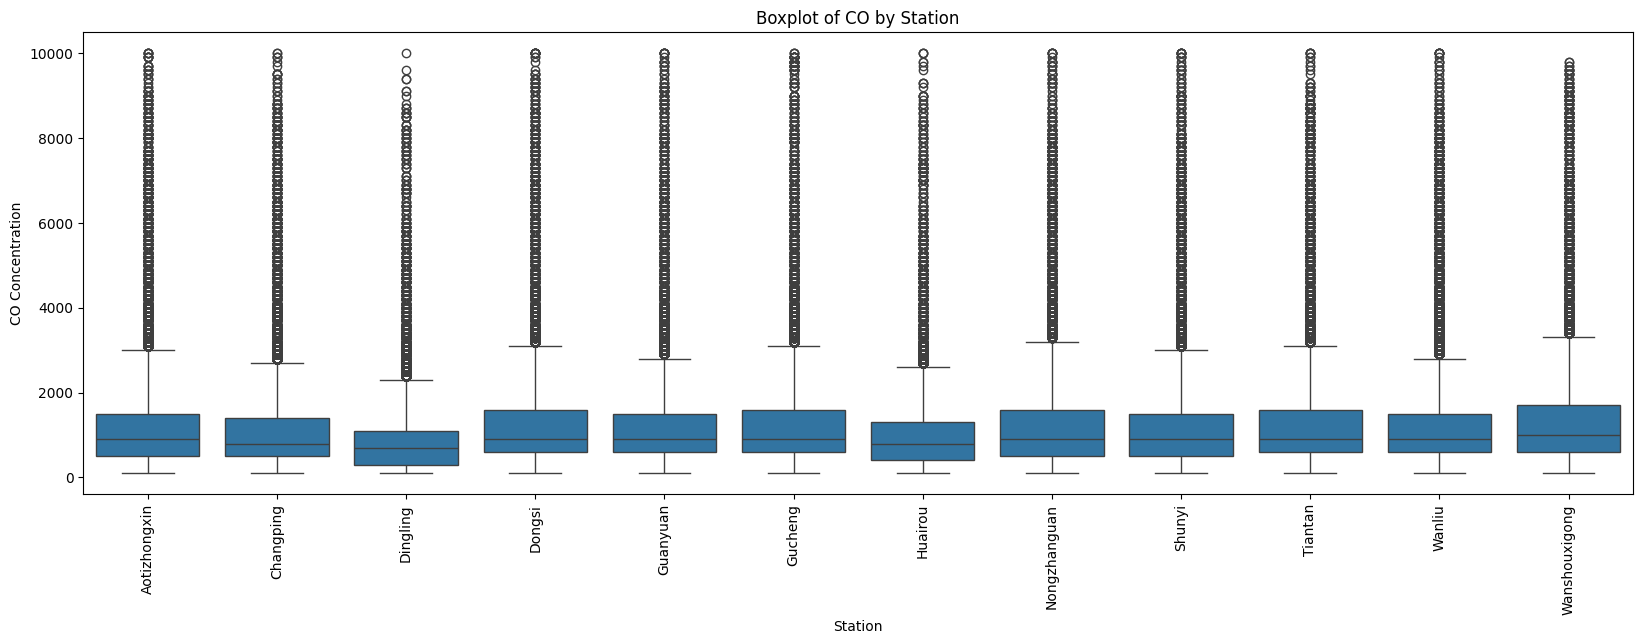

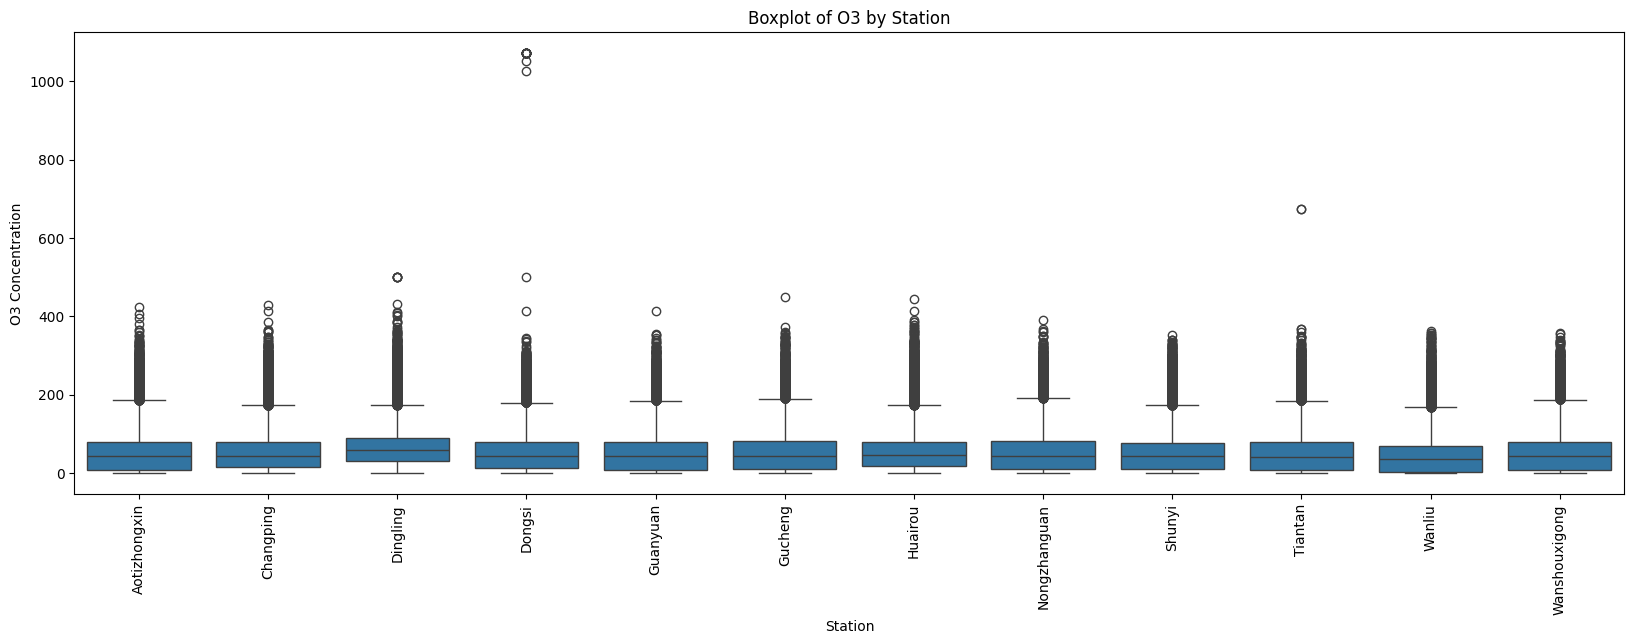

In [59]:
# Boxplots of pollutants by station
stations = df['station'].unique()
for pollutant in pollutants:
    plt.figure(figsize=(20, 6))
    sns.boxplot(x='station', y=pollutant, data=df)
    plt.title(f'Boxplot of {pollutant} by Station')
    plt.xlabel('Station')
    plt.ylabel(f'{pollutant} Concentration')
    plt.xticks(rotation=90)
    plt.show()

## **Task 3**

In [60]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

In [61]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols.tolist())

# Handle missing values in categorical columns (if any)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for future use



Categorical Columns: ['wd', 'station', 'Date', 'AQI', 'day_of_week']


<ipython-input-61-ae734da116ee>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [62]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,Date,Open,High,Low,Close,Adj Close,Volume,AQI,date,day_of_week
0,2013.0,3.0,1.0,0.0,4.0,4.0,4.0,7.0,300.0,77.0,...,0,95.359999,96.310001,93.305001,94.420002,93.013126,22718150.0,2,2013-03-01 00:00:00,0
1,2013.0,3.0,1.0,1.0,8.0,8.0,4.0,7.0,300.0,77.0,...,0,95.359999,96.310001,93.305001,94.420002,93.013126,22718150.0,2,2013-03-01 01:00:00,0
2,2013.0,3.0,1.0,2.0,7.0,7.0,5.0,10.0,300.0,73.0,...,0,95.359999,96.310001,93.305001,94.420002,93.013126,22718150.0,2,2013-03-01 02:00:00,0
3,2013.0,3.0,1.0,3.0,6.0,6.0,11.0,11.0,300.0,72.0,...,0,95.359999,96.310001,93.305001,94.420002,93.013126,22718150.0,2,2013-03-01 03:00:00,0
4,2013.0,3.0,1.0,4.0,3.0,3.0,12.0,12.0,300.0,72.0,...,0,95.359999,96.310001,93.305001,94.420002,93.013126,22718150.0,2,2013-03-01 04:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421769,2015.0,7.0,16.0,12.0,55.0,82.0,7.0,43.0,900.0,45.0,...,498,365.000000,368.790009,358.519989,360.059998,360.059998,48155800.0,5,2015-07-16 11:30:00,4
421770,2015.0,7.0,16.0,12.0,55.0,82.0,7.0,43.0,900.0,45.0,...,499,360.700012,365.000000,357.570007,364.839996,364.839996,34380600.0,5,2015-07-16 11:30:00,4
421771,2015.0,7.0,16.0,12.0,55.0,82.0,7.0,43.0,900.0,45.0,...,500,364.410004,365.320007,353.019989,353.630005,353.630005,51314200.0,5,2015-07-16 11:30:00,4
421772,2015.0,7.0,16.0,12.0,55.0,82.0,7.0,43.0,900.0,45.0,...,501,353.250000,362.170013,351.279999,361.779999,361.779999,32661500.0,5,2015-07-16 11:30:00,4


In [65]:
df.drop('date', axis =1)


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,station,Date,Open,High,Low,Close,Adj Close,Volume,AQI,day_of_week
0,2013.0,3.0,1.0,0.0,4.0,4.0,4.0,7.0,300.0,77.0,...,0,0,95.359999,96.310001,93.305001,94.420002,93.013126,22718150.0,2,0
1,2013.0,3.0,1.0,1.0,8.0,8.0,4.0,7.0,300.0,77.0,...,0,0,95.359999,96.310001,93.305001,94.420002,93.013126,22718150.0,2,0
2,2013.0,3.0,1.0,2.0,7.0,7.0,5.0,10.0,300.0,73.0,...,0,0,95.359999,96.310001,93.305001,94.420002,93.013126,22718150.0,2,0
3,2013.0,3.0,1.0,3.0,6.0,6.0,11.0,11.0,300.0,72.0,...,0,0,95.359999,96.310001,93.305001,94.420002,93.013126,22718150.0,2,0
4,2013.0,3.0,1.0,4.0,3.0,3.0,12.0,12.0,300.0,72.0,...,0,0,95.359999,96.310001,93.305001,94.420002,93.013126,22718150.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421769,2015.0,7.0,16.0,12.0,55.0,82.0,7.0,43.0,900.0,45.0,...,0,498,365.000000,368.790009,358.519989,360.059998,360.059998,48155800.0,5,4
421770,2015.0,7.0,16.0,12.0,55.0,82.0,7.0,43.0,900.0,45.0,...,0,499,360.700012,365.000000,357.570007,364.839996,364.839996,34380600.0,5,4
421771,2015.0,7.0,16.0,12.0,55.0,82.0,7.0,43.0,900.0,45.0,...,0,500,364.410004,365.320007,353.019989,353.630005,353.630005,51314200.0,5,4
421772,2015.0,7.0,16.0,12.0,55.0,82.0,7.0,43.0,900.0,45.0,...,0,501,353.250000,362.170013,351.279999,361.779999,361.779999,32661500.0,5,4


In [63]:
# Separate features and target variable
X = df.drop(['AQI','date'], axis=1)  # Assuming 'AQI' is the target variable
y = df['AQI']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421774 entries, 0 to 421773
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         421774 non-null  float64
 1   month        421774 non-null  float64
 2   day          421774 non-null  float64
 3   hour         421774 non-null  float64
 4   PM2.5        421774 non-null  float64
 5   PM10         421774 non-null  float64
 6   SO2          421774 non-null  float64
 7   NO2          421774 non-null  float64
 8   CO           421774 non-null  float64
 9   O3           421774 non-null  float64
 10  TEMP         421774 non-null  float64
 11  PRES         421774 non-null  float64
 12  DEWP         421774 non-null  float64
 13  RAIN         421774 non-null  float64
 14  wd           421774 non-null  int64  
 15  WSPM         421774 non-null  float64
 16  station      421774 non-null  int64  
 17  Date         421774 non-null  int64  
 18  Open         421774 non-

In [66]:
# Compute correlation matrix
corr_matrix = df.corr().abs()

# Set a threshold for high correlation
threshold = 0.8

# Find pairs of features with correlation above the threshold
high_corr_var = np.where(corr_matrix > threshold)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

print("\nHighly Correlated Features:")
print(high_corr_var)




Highly Correlated Features:
[('year', 'date'), ('PM2.5', 'PM10'), ('TEMP', 'PRES'), ('TEMP', 'DEWP'), ('Open', 'High'), ('Open', 'Low'), ('Open', 'Close'), ('Open', 'Adj Close'), ('High', 'Low'), ('High', 'Close'), ('High', 'Adj Close'), ('Low', 'Close'), ('Low', 'Adj Close'), ('Close', 'Adj Close')]


In [67]:

# Remove one feature from each pair of highly correlated features
cols_to_remove = set()
for pair in high_corr_var:
    cols_to_remove.add(pair[1])  # Remove the second feature in the pair



In [68]:
# Check class distribution
print("\nOriginal Class Distribution:")
print(y.value_counts())

# Apply Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_scaled, y)

# Verify the class distribution after balancing
print("\nClass Distribution After Balancing:")
print(pd.Series(y_balanced).value_counts())



Original Class Distribution:
AQI
5    350963
2     32656
3     20094
1      9711
6      4075
0      2784
4      1491
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(



Class Distribution After Balancing:
AQI
2    350963
5    350963
1    350963
4    350963
6    350963
0    350963
3    350963
Name: count, dtype: int64


In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)


# **DecisionTreeClassifier**




In [70]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=77)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=77)


Test Set Accuracy: 99.89%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105289
           1       1.00      1.00      1.00    105289
           2       1.00      1.00      1.00    105289
           3       1.00      1.00      1.00    105289
           4       1.00      1.00      1.00    105289
           5       1.00      0.99      1.00    105289
           6       1.00      1.00      1.00    105289

    accuracy                           1.00    737023
   macro avg       1.00      1.00      1.00    737023
weighted avg       1.00      1.00      1.00    737023



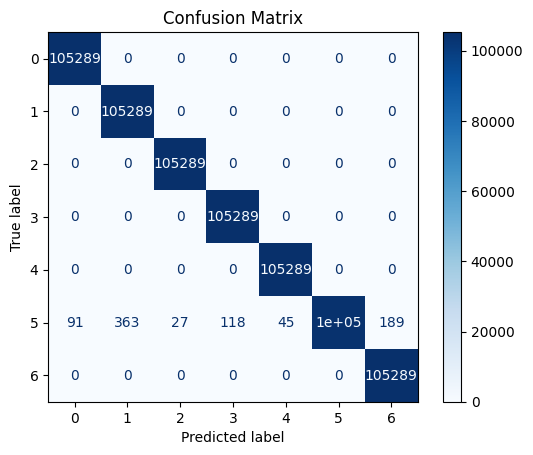

In [71]:
# Make predictions on the test set
y_pred =model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {accuracy*100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [72]:
import joblib

joblib.dump(model, 'DecisionTreeClassifier.joblib')

['DecisionTreeClassifier.joblib']

In [73]:
from google.colab import files
files.download('DecisionTreeClassifier.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Logistic regression

In [ ]:

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nTest Set Accuracy (Logistic Regression): {accuracy_lr*100:.2f}%")

# Classification Report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()